# Time Series Workflow


## Imports

In [1]:
import pandas as pd
from io import StringIO
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# read text file
with open ('ECA_blended_custom/TG_STAID002759.txt') as file:
    whole_data = file.read()
#whole_data

In [3]:
# Data cleaning
marker = ' SOUID,    DATE,   TG, Q_TG'
part1, part2 = whole_data.split(marker)

In [4]:
colnames = ['SOUID', 'DATE', 'mean_temperature', 'Q_TG']
data = pd.read_csv(StringIO(part2), names=colnames, header=None, sep=',')

In [5]:
# convert to datetime
data['DATE'] = pd.to_datetime(data['DATE'],format='%Y%m%d')
data = data.set_index(['DATE'])
data = data.drop(columns=['SOUID', 'Q_TG'])

In [6]:
data

,mean_temperature
DATE,
1876-01-01,22
1876-01-02,25
1876-01-03,3
1876-01-04,-58
1876-01-05,-98
...,...
2022-12-27,42
2022-12-28,63
2022-12-29,100


In [7]:
data['mean_temperature'] = data['mean_temperature'] * 0.1

In [8]:
data

,mean_temperature
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


In [9]:
# Check for null values
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53691 entries, 1876-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_temperature  53691 non-null  float64
dtypes: float64(1)
memory usage: 838.9 KB
None
(53691, 1)


In [10]:
data.isnull().sum()


mean_temperature    0
dtype: int64

In [11]:
data.isna().sum()


mean_temperature    0
dtype: int64

In [12]:
print(data['mean_temperature'].describe())
# we have missing value -999.90 we are replacing them

count    53691.000000
mean         5.746110
std         61.223698
min       -999.900000
25%          3.300000
50%          9.400000
75%         15.700000
max         30.500000
Name: mean_temperature, dtype: float64


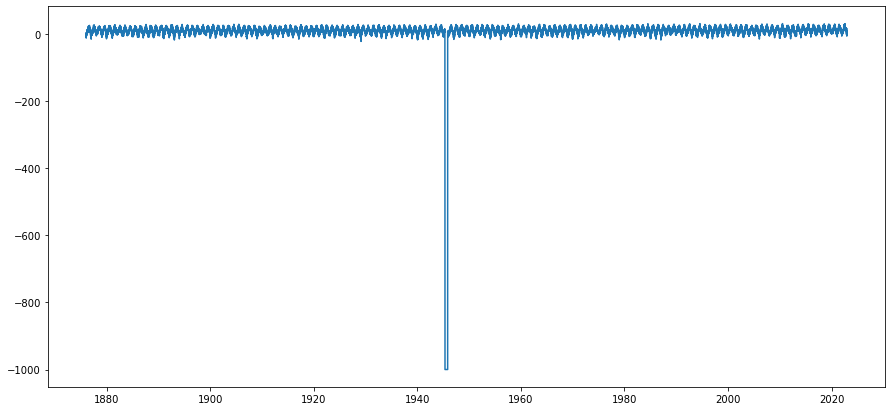

In [13]:
 # set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
plt.plot(data)
plt.show()

In [14]:
data_set = data[data['mean_temperature'] < -100]
data_set

,mean_temperature
DATE,
1945-04-25,-999.9
1945-04-26,-999.9
1945-04-27,-999.9
1945-04-28,-999.9
1945-04-29,-999.9
...,...
1945-11-01,-999.9
1945-11-02,-999.9
1945-11-03,-999.9


In [15]:
# Data imputation --> we have missing data

prior_year = data['1944-04-25': '1944-11-05'].to_numpy()
post_year =  data['1946-04-25': '1946-11-05'].to_numpy()
war_year = (prior_year + post_year) /2
data.loc['1945-04-25':'1945-11-05'] = war_year



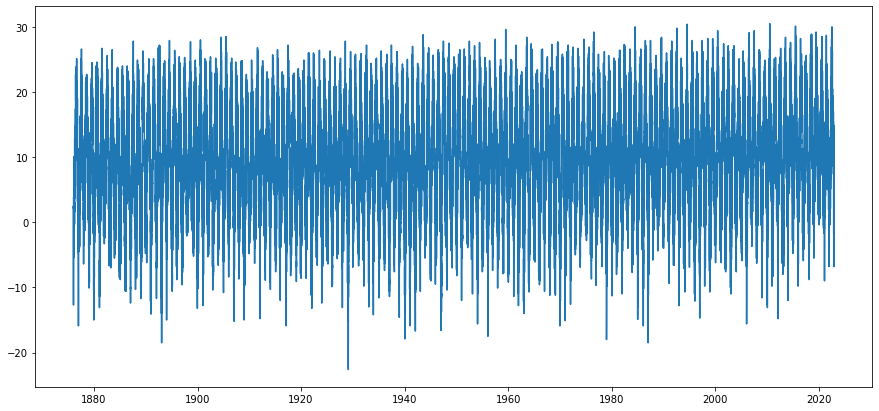

In [16]:
# Visualize the Data, plot the data
plt.rcParams['figure.figsize']=(15,7)
plt.plot(data)
plt.show()

## Model the trend

In [17]:
# Create a timestep variable
data['timestep'] = list(range(len(data)))
data

,mean_temperature,timestep
DATE,,
1876-01-01,2.2,0
1876-01-02,2.5,1
1876-01-03,0.3,2
1876-01-04,-5.8,3
1876-01-05,-9.8,4
...,...,...
2022-12-27,4.2,53686
2022-12-28,6.3,53687
2022-12-29,10.0,53688


In [18]:
# Train-Test-Split

train = data[:-365]
test = data[-365:]

In [19]:
train

,mean_temperature,timestep
DATE,,
1876-01-01,2.2,0
1876-01-02,2.5,1
1876-01-03,0.3,2
1876-01-04,-5.8,3
1876-01-05,-9.8,4
...,...,...
2021-12-27,-3.9,53321
2021-12-28,-0.5,53322
2021-12-29,4.5,53323


In [20]:
test

,mean_temperature,timestep
DATE,,
2022-01-01,12.0,53326
2022-01-02,9.9,53327
2022-01-03,8.9,53328
2022-01-04,6.4,53329
2022-01-05,3.8,53330
...,...,...
2022-12-27,4.2,53686
2022-12-28,6.3,53687
2022-12-29,10.0,53688


In [21]:
# Run a Linear Regression
lr = LinearRegression()

In [22]:
# X = train[['month']] # Gave us a stepwise function without any obvious trend over time? check it yourself
X_train = train[['timestep']]

In [23]:
X_train

,timestep
DATE,
1876-01-01,0
1876-01-02,1
1876-01-03,2
1876-01-04,3
1876-01-05,4
...,...
2021-12-27,53321
2021-12-28,53322
2021-12-29,53323


In [24]:
y_train = train['mean_temperature']

In [25]:
y_train

DATE
1876-01-01     2.2
1876-01-02     2.5
1876-01-03     0.3
1876-01-04    -5.8
1876-01-05    -9.8
              ... 
2021-12-27    -3.9
2021-12-28    -0.5
2021-12-29     4.5
2021-12-30     9.3
2021-12-31    13.0
Name: mean_temperature, Length: 53326, dtype: float64

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

## Plot the trend and the original data

In [27]:
# Use the model to make a prediction
train['trend'] = lr.predict(X_train)
train.head(15)

,mean_temperature,timestep,trend
DATE,,,
1876-01-01,2.2,0,8.524213
1876-01-02,2.5,1,8.524247
1876-01-03,0.3,2,8.524280
1876-01-04,-5.8,3,8.524314
1876-01-05,-9.8,4,8.524347
1876-01-06,-7.7,5,8.524381
1876-01-07,-6.6,6,8.524414
1876-01-08,-8.9,7,8.524448
1876-01-09,-12.7,8,8.524481


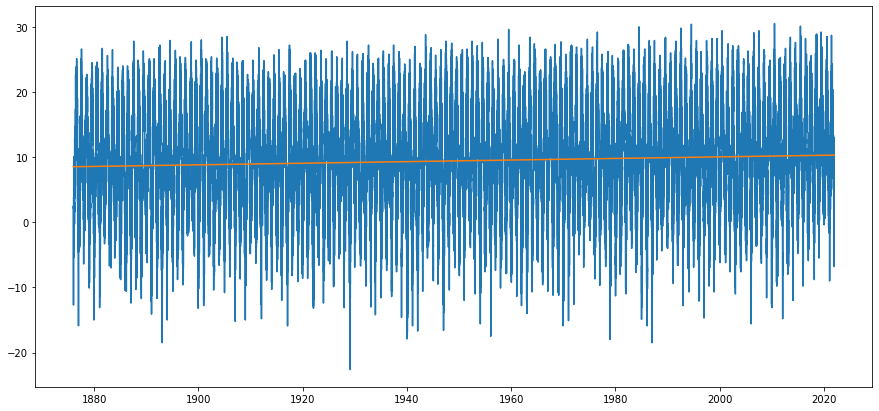

In [28]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(train[['mean_temperature', 'trend']])
plt.show()

In [29]:
#!pip install plotly
#import plotly.express as px

In [30]:
lr.intercept_,lr.coef_

(8.52421312688638, array([3.3505986e-05]))

## Model the seasonality

In [31]:
# one-hot encode the months
train['month'] = train.index.month
seasonal_dummies = pd.get_dummies(train.month,prefix='month')
train = train.join(seasonal_dummies)
train

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.524213,1,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.5,1,8.524247,1,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0.3,2,8.524280,1,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,3,8.524314,1,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,4,8.524347,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-3.9,53321,10.310786,12,0,0,0,0,0,0,0,0,0,0,0,1
2021-12-28,-0.5,53322,10.310819,12,0,0,0,0,0,0,0,0,0,0,0,1
2021-12-29,4.5,53323,10.310853,12,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
# Define X and y
X_train = train.drop(columns=['mean_temperature', 'month', 'trend'])

In [33]:
X_train

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,
1876-01-01,0,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,2,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,3,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,53321,0,0,0,0,0,0,0,0,0,0,0,1
2021-12-28,53322,0,0,0,0,0,0,0,0,0,0,0,1
2021-12-29,53323,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
y_train

DATE
1876-01-01     2.2
1876-01-02     2.5
1876-01-03     0.3
1876-01-04    -5.8
1876-01-05    -9.8
              ... 
2021-12-27    -3.9
2021-12-28    -0.5
2021-12-29     4.5
2021-12-30     9.3
2021-12-31    13.0
Name: mean_temperature, Length: 53326, dtype: float64

In [35]:
lr_both = LinearRegression()
lr_both.fit(X_train, y_train)

LinearRegression()

In [36]:
# Create a model with trend and seasonality
train['trend_seasonal'] = lr_both.predict(X_train)
train.head()

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
DATE,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.524213,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876630
1876-01-02,2.5,1,8.524247,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876597
1876-01-03,0.3,2,8.524280,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876564
1876-01-04,-5.8,3,8.524314,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876531
1876-01-05,-9.8,4,8.524347,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876499


## Plot the original data and the trend-seasonality

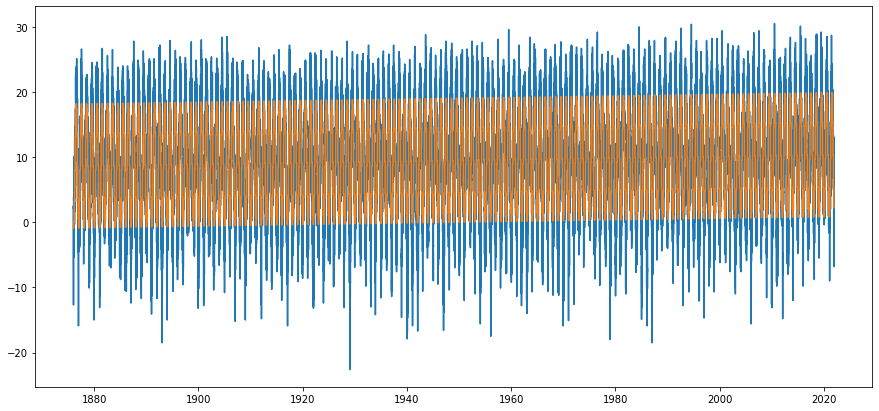

In [37]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(train[['mean_temperature', 'trend_seasonal']])
plt.show()

## Extract the remainder

In [38]:
train

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
DATE,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.524213,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876630
1876-01-02,2.5,1,8.524247,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876597
1876-01-03,0.3,2,8.524280,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876564
1876-01-04,-5.8,3,8.524314,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876531
1876-01-05,-9.8,4,8.524347,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-3.9,53321,10.310786,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232610
2021-12-28,-0.5,53322,10.310819,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232643
2021-12-29,4.5,53323,10.310853,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232676


In [39]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
train['remainder'] = train.mean_temperature - train.trend_seasonal

In [40]:
train.head()

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder
DATE,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.524213,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876630,3.076630
1876-01-02,2.5,1,8.524247,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876597,3.376597
1876-01-03,0.3,2,8.524280,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876564,1.176564
1876-01-04,-5.8,3,8.524314,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876531,-4.923469
1876-01-05,-9.8,4,8.524347,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876499,-8.923501


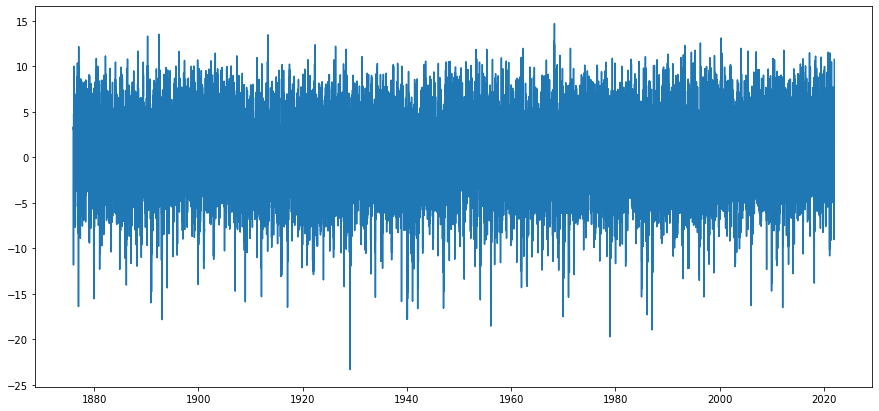

In [41]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(train[['remainder']])
plt.show()

In [42]:
train['remainder'].mean(), train.remainder.std()

(-2.3877519080412924e-16, 3.9249930984720467)

In [43]:
import numpy as np

In [44]:
train.shape

(53326, 18)

In [45]:
random_array = np.random.normal(loc=0, scale=10, size=53326)
train['random'] = random_array

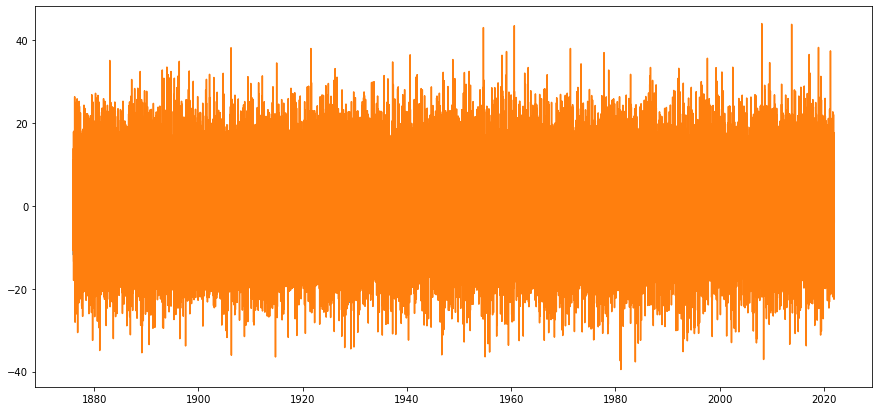

In [46]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(train[['remainder', 'random']])
plt.show()

## Save the remainder

In [47]:
train[['remainder']].to_csv('train_remainder.csv')

In [48]:
# reading remainder
df_remainder = pd.read_csv('train_remainder.csv', index_col=0, parse_dates=True)
df_remainder.head()

,remainder
DATE,
1876-01-01,3.076630
1876-01-02,3.376597
1876-01-03,1.176564
1876-01-04,-4.923469
1876-01-05,-8.923501


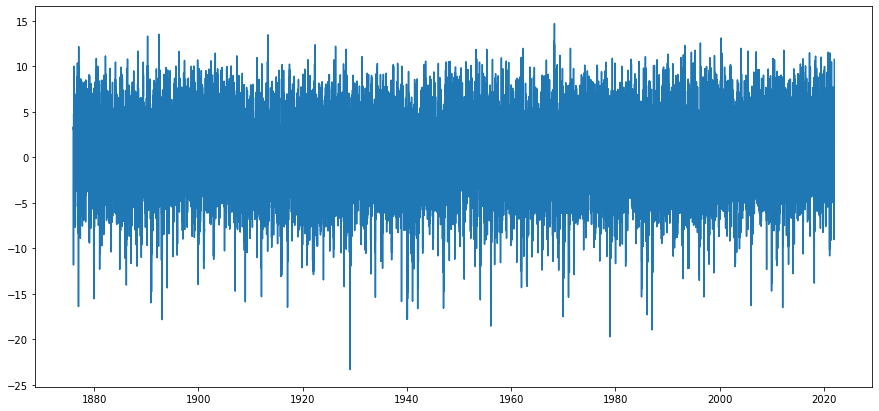

In [49]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(df_remainder['remainder'])
plt.show()

### Create a time-lagged input feature: lag1

In [50]:
df_remainder['lag1'] = df_remainder['remainder'].shift(1)

In [51]:
df_remainder

,remainder,lag1
DATE,,
1876-01-01,3.076630,NaN
1876-01-02,3.376597,3.076630
1876-01-03,1.176564,3.376597
1876-01-04,-4.923469,1.176564
1876-01-05,-8.923501,-4.923469
...,...,...
2021-12-27,-6.132610,-9.032577
2021-12-28,-2.732643,-6.132610
2021-12-29,2.267324,-2.732643


In [52]:
# Inspect correlations
df_remainder.corr()

,remainder,lag1
remainder,1.000000,0.803781
lag1,0.803781,1.000000


### Plot remainder against lag1

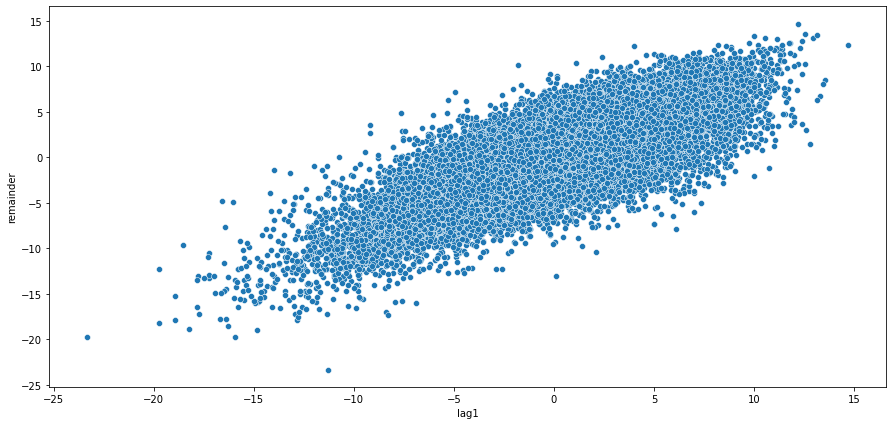

In [53]:
sns.scatterplot(x='lag1', y='remainder', data=df_remainder);

### The Autoregressive Model (AR)

In [54]:
# Drop missing values
df_remainder.dropna(inplace=True)
df_remainder.head()

,remainder,lag1
DATE,,
1876-01-02,3.376597,3.076630
1876-01-03,1.176564,3.376597
1876-01-04,-4.923469,1.176564
1876-01-05,-8.923501,-4.923469
1876-01-06,-6.823534,-8.923501


In [55]:
# Assign X and y
X = df_remainder[['lag1']]
X

,lag1
DATE,
1876-01-02,3.076630
1876-01-03,3.376597
1876-01-04,1.176564
1876-01-05,-4.923469
1876-01-06,-8.923501
...,...
2021-12-27,-9.032577
2021-12-28,-6.132610
2021-12-29,-2.732643


In [56]:
train = train[1:]
y = train['mean_temperature']
y

DATE
1876-01-02     2.5
1876-01-03     0.3
1876-01-04    -5.8
1876-01-05    -9.8
1876-01-06    -7.7
              ... 
2021-12-27    -3.9
2021-12-28    -0.5
2021-12-29     4.5
2021-12-30     9.3
2021-12-31    13.0
Name: mean_temperature, Length: 53325, dtype: float64

In [57]:
# Create and fit the model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [58]:
# Create predictions
train['prediction_lag1'] = lr.predict(X)
train

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,random,prediction_lag1
DATE,,,,,,,,,,,,,,,,,,,,
1876-01-02,2.5,1,8.524247,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876597,3.376597,-6.144094,11.933573
1876-01-03,0.3,2,8.524280,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876564,1.176564,-4.405849,12.178851
1876-01-04,-5.8,3,8.524314,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876531,-4.923469,-8.632913,10.379923
1876-01-05,-9.8,4,8.524347,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876499,-8.923501,-1.111801,5.392033
1876-01-06,-7.7,5,8.524381,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876466,-6.823534,-10.717945,2.121276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-3.9,53321,10.310786,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232610,-6.132610,1.464928,2.032087
2021-12-28,-0.5,53322,10.310819,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232643,-2.732643,2.609447,4.403339
2021-12-29,4.5,53323,10.310853,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232676,2.267324,-9.588821,7.183433


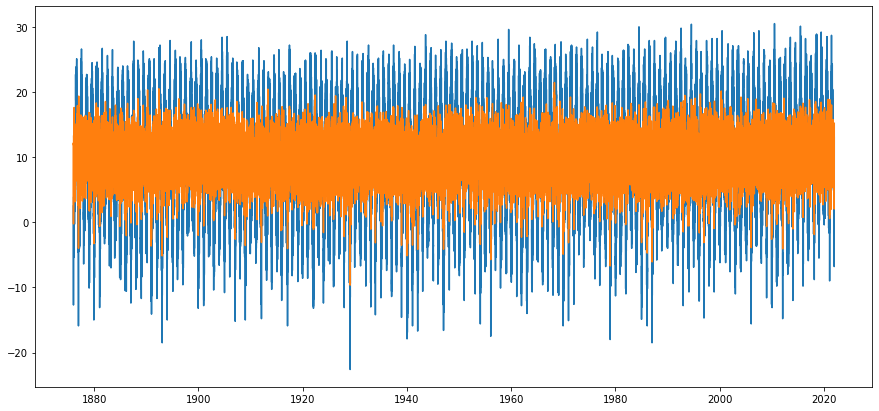

In [59]:
# Plot the original remainder and the prediction
plt.rcParams['figure.figsize']=(15,7)
plt.plot(train[['mean_temperature','prediction_lag1']])
plt.show()

In [60]:
# Is the remainder prediction error smaller than the remainder itself?
#df['remainder'].plot(ylim=[-30,30])
#(df['remainder'] - df['predictions_ar1']).plot(ylim=[-30,30]);

In [61]:
# Should we add another lag (lag2)
df_remainder['lag2'] = df_remainder['remainder'].shift(2)
df_remainder['lag3'] = df_remainder['remainder'].shift(3)
df_remainder['lag4'] = df_remainder['remainder'].shift(4)

df_remainder.head()

,remainder,lag1,lag2,lag3,lag4
DATE,,,,,
1876-01-02,3.376597,3.076630,NaN,NaN,NaN
1876-01-03,1.176564,3.376597,NaN,NaN,NaN
1876-01-04,-4.923469,1.176564,3.376597,NaN,NaN
1876-01-05,-8.923501,-4.923469,1.176564,3.376597,NaN
1876-01-06,-6.823534,-8.923501,-4.923469,1.176564,3.376597


In [62]:
df_remainder.shape

(53325, 5)

In [63]:
round(df_remainder[['remainder', 'lag1', 'lag2','lag3', 'lag4']].corr(), 2)

,remainder,lag1,lag2,lag3,lag4
remainder,1.00,0.80,0.6,0.46,0.37
lag1,0.80,1.00,0.8,0.60,0.46
lag2,0.60,0.80,1.0,0.80,0.60
lag3,0.46,0.60,0.8,1.00,0.80
lag4,0.37,0.46,0.6,0.80,1.00


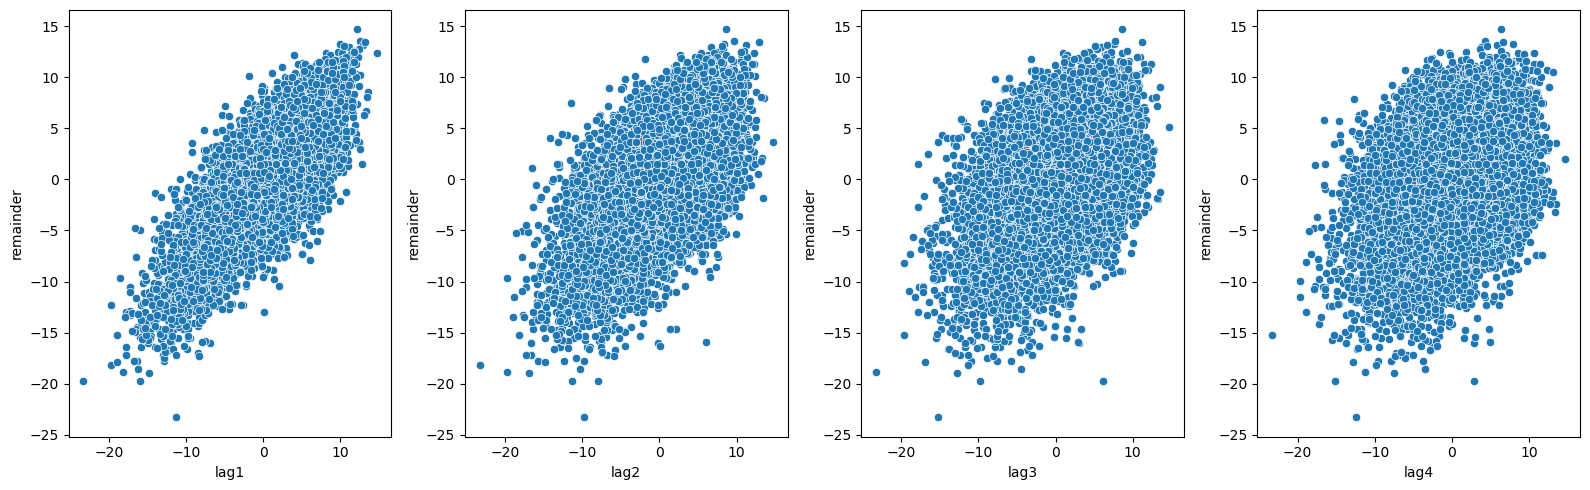

In [64]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style
p=4
lag_columns = df_remainder.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df_remainder[lag_columns[i]],y=df_remainder['remainder'],ax=axes[i])
    
plt.tight_layout()

As there is some correlation between lag2 and remainder (0.6), it would at first sight seem sensible to add lag2 as well. However, we have already used lag1 to make some predictions on the remainder and should not look at lag2 versus remainder but on lag2 versus the unexplained "remainder of the remainder". Or in other words:

The relation between the remainder and lag2 might just be due to the relation between the remainder and lag1 and the relation between lag1 and lag2.

In [65]:
#!conda install statsmodels -y
#!pip install statsmodels
#!pip install --upgrade --no-deps statsmodels

In [66]:
df_remainder

,remainder,lag1,lag2,lag3,lag4
DATE,,,,,
1876-01-02,3.376597,3.076630,NaN,NaN,NaN
1876-01-03,1.176564,3.376597,NaN,NaN,NaN
1876-01-04,-4.923469,1.176564,3.376597,NaN,NaN
1876-01-05,-8.923501,-4.923469,1.176564,3.376597,NaN
1876-01-06,-6.823534,-8.923501,-4.923469,1.176564,3.376597
...,...,...,...,...,...
2021-12-27,-6.132610,-9.032577,-7.732545,-0.232512,-3.332479
2021-12-28,-2.732643,-6.132610,-9.032577,-7.732545,-0.232512
2021-12-29,2.267324,-2.732643,-6.132610,-9.032577,-7.732545


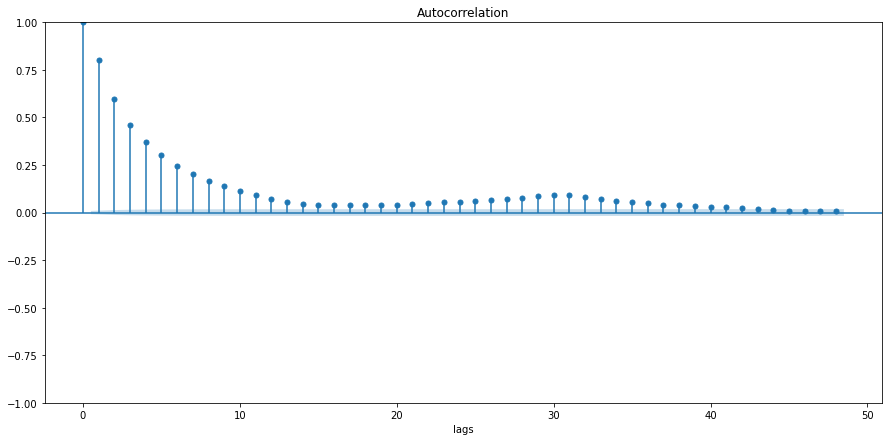

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_remainder['remainder'])
plt.xlabel('lags');

Let's have a look at the different Autocorrelations

In [68]:
# white noise or random noise
import numpy as np
random_array = np.random.normal(loc=0, scale=10, size=53325)
df_remainder['random'] = random_array

<AxesSubplot:xlabel='DATE'>

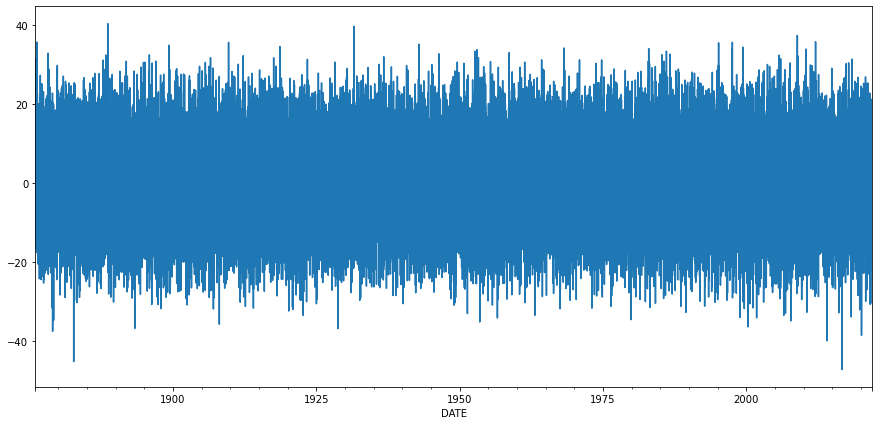

In [69]:
df_remainder['random'].plot()

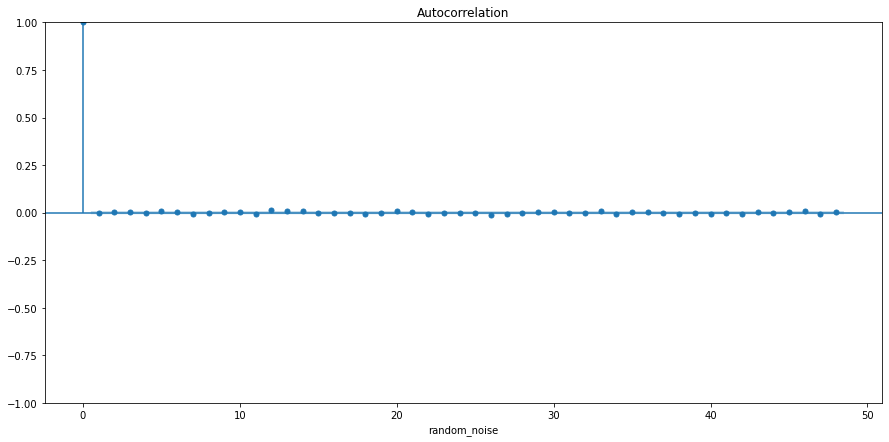

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_remainder['random'])
plt.xlabel('random_noise');

### Determine Partial Autocorrelation

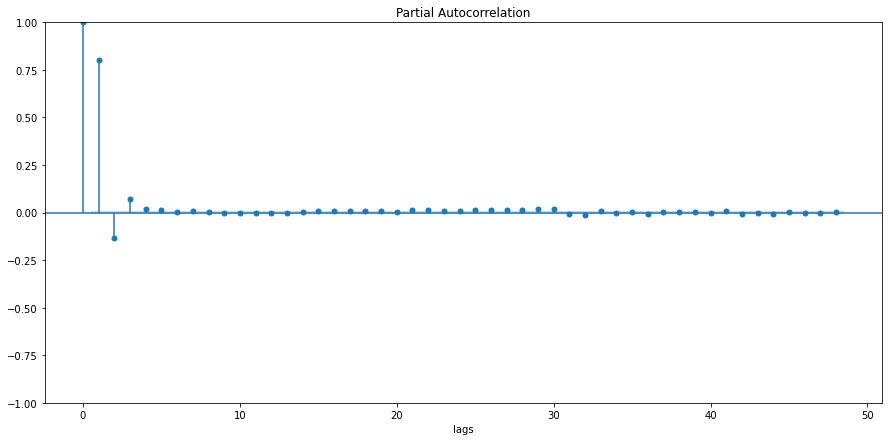

In [71]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_remainder['remainder'])
plt.xlabel('lags');

### Box-Jenkins-Methodology

In [72]:
from statsmodels.tsa.ar_model import ar_select_order
lags_order = ar_select_order(df_remainder['remainder'], maxlag=5)
lags_order.ar_lags

/home/nazila/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/nazila/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4]

In [73]:
lags_order.bic

{(1, 2, 3, 4): 240569.78685855697,
 (1, 2, 3, 4, 5): 240571.2339862709,
 (1, 2, 3): 240573.33722532287,
 (1, 2): 240819.67668501977,
 (1,): 241765.79677156548,
 0: 297136.03984066675}

In [74]:
train.head()

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,random,prediction_lag1
DATE,,,,,,,,,,,,,,,,,,,,
1876-01-02,2.5,1,8.524247,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876597,3.376597,-6.144094,11.933573
1876-01-03,0.3,2,8.524280,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876564,1.176564,-4.405849,12.178851
1876-01-04,-5.8,3,8.524314,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876531,-4.923469,-8.632913,10.379923
1876-01-05,-9.8,4,8.524347,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876499,-8.923501,-1.111801,5.392033
1876-01-06,-7.7,5,8.524381,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876466,-6.823534,-10.717945,2.121276


In [75]:
df_remainder = df_remainder.iloc[4:]

In [76]:
df_remainder

,remainder,lag1,lag2,lag3,lag4,random
DATE,,,,,,
1876-01-06,-6.823534,-8.923501,-4.923469,1.176564,3.376597,11.316854
1876-01-07,-5.723567,-6.823534,-8.923501,-4.923469,1.176564,-4.447070
1876-01-08,-8.023600,-5.723567,-6.823534,-8.923501,-4.923469,15.296710
1876-01-09,-11.823633,-8.023600,-5.723567,-6.823534,-8.923501,-0.594566
1876-01-10,-8.023666,-11.823633,-8.023600,-5.723567,-6.823534,4.834872
...,...,...,...,...,...,...
2021-12-27,-6.132610,-9.032577,-7.732545,-0.232512,-3.332479,-22.067825
2021-12-28,-2.732643,-6.132610,-9.032577,-7.732545,-0.232512,10.361264
2021-12-29,2.267324,-2.732643,-6.132610,-9.032577,-7.732545,-30.529252


In [77]:
train.head()

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,random,prediction_lag1
DATE,,,,,,,,,,,,,,,,,,,,
1876-01-02,2.5,1,8.524247,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876597,3.376597,-6.144094,11.933573
1876-01-03,0.3,2,8.524280,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876564,1.176564,-4.405849,12.178851
1876-01-04,-5.8,3,8.524314,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876531,-4.923469,-8.632913,10.379923
1876-01-05,-9.8,4,8.524347,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876499,-8.923501,-1.111801,5.392033
1876-01-06,-7.7,5,8.524381,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.876466,-6.823534,-10.717945,2.121276


In [78]:
train = train.iloc[4:]

In [79]:
train_whole = train
train = train.drop(columns=['trend','month','trend_seasonal', 'remainder', 'random', 'prediction_lag1'])
train

,mean_temperature,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,
1876-01-06,-7.7,5,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-07,-6.6,6,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-08,-8.9,7,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-09,-12.7,8,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-10,-8.9,9,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-3.9,53321,0,0,0,0,0,0,0,0,0,0,0,1
2021-12-28,-0.5,53322,0,0,0,0,0,0,0,0,0,0,0,1
2021-12-29,4.5,53323,0,0,0,0,0,0,0,0,0,0,0,1


In [80]:
train = train.join(df_remainder)
train 

,mean_temperature,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,remainder,lag1,lag2,lag3,lag4,random
DATE,,,,,,,,,,,,,,,,,,,,
1876-01-06,-7.7,5,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564,3.376597,11.316854
1876-01-07,-6.6,6,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469,1.176564,-4.447070
1876-01-08,-8.9,7,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501,-4.923469,15.296710
1876-01-09,-12.7,8,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534,-8.923501,-0.594566
1876-01-10,-8.9,9,1,0,0,0,0,0,0,0,0,0,0,0,-8.023666,-11.823633,-8.023600,-5.723567,-6.823534,4.834872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-3.9,53321,0,0,0,0,0,0,0,0,0,0,0,1,-6.132610,-9.032577,-7.732545,-0.232512,-3.332479,-22.067825
2021-12-28,-0.5,53322,0,0,0,0,0,0,0,0,0,0,0,1,-2.732643,-6.132610,-9.032577,-7.732545,-0.232512,10.361264
2021-12-29,4.5,53323,0,0,0,0,0,0,0,0,0,0,0,1,2.267324,-2.732643,-6.132610,-9.032577,-7.732545,-30.529252


In [81]:
train = train.drop(columns=['remainder', 'random'])


In [82]:
train.head()

,mean_temperature,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,,
1876-01-06,-7.7,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597
1876-01-07,-6.6,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564
1876-01-08,-8.9,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469
1876-01-09,-12.7,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501
1876-01-10,-8.9,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534


In [83]:
X_train = train.drop(columns=['mean_temperature'])
y_train = train['mean_temperature']

In [84]:
X_train.head()

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,
1876-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597
1876-01-07,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564
1876-01-08,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469
1876-01-09,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501
1876-01-10,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534


In [85]:
y_train

DATE
1876-01-06    -7.7
1876-01-07    -6.6
1876-01-08    -8.9
1876-01-09   -12.7
1876-01-10    -8.9
              ... 
2021-12-27    -3.9
2021-12-28    -0.5
2021-12-29     4.5
2021-12-30     9.3
2021-12-31    13.0
Name: mean_temperature, Length: 53321, dtype: float64

In [86]:
m = LinearRegression()
m.fit(X_train, y_train)

LinearRegression()

In [87]:
y_train = y_train.to_frame()

In [88]:
y_train

,mean_temperature
DATE,
1876-01-06,-7.7
1876-01-07,-6.6
1876-01-08,-8.9
1876-01-09,-12.7
1876-01-10,-8.9
...,...
2021-12-27,-3.9
2021-12-28,-0.5
2021-12-29,4.5


In [89]:
# Create predictions
y_train['prediction_all'] = m.predict(X_train)


In [90]:
y_train

,mean_temperature,prediction_all
DATE,,
1876-01-06,-7.7,-7.976898
1876-01-07,-6.6,-5.641166
1876-01-08,-8.9,-5.354637
1876-01-09,-12.7,-7.633844
1876-01-10,-8.9,-10.587048
...,...,...
2021-12-27,-3.9,-4.620801
2021-12-28,-0.5,-2.059303
2021-12-29,4.5,0.309502


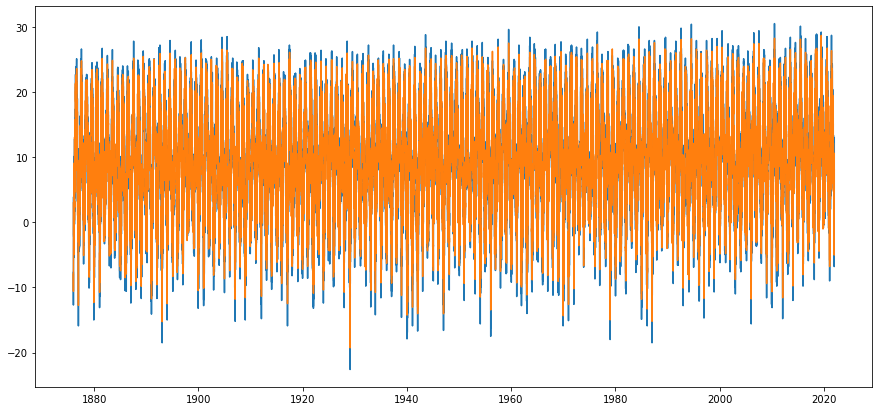

In [91]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(y_train[['mean_temperature', 'prediction_all']])
plt.show()

### Is m a good model?

#### Evaluate our model

In [92]:
X_train.head()

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,
1876-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597
1876-01-07,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564
1876-01-08,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469
1876-01-09,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501
1876-01-10,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534


In [93]:
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=5)

In [94]:
for i, (train_index, validation_index) in enumerate(ts_split.split(X_train, y_train)):
    print(f'The training data for the {i+1}th iteration are the observations {train_index[0]} to {train_index[-1]}')
    print(f'The validation data for the {i+1}th iteration are the observations {validation_index[0]} to {validation_index[-1]}')
    print()

The training data for the 1th iteration are the observations 0 to 8890
The validation data for the 1th iteration are the observations 8891 to 17776

The training data for the 2th iteration are the observations 0 to 17776
The validation data for the 2th iteration are the observations 17777 to 26662

The training data for the 3th iteration are the observations 0 to 26662
The validation data for the 3th iteration are the observations 26663 to 35548

The training data for the 4th iteration are the observations 0 to 35548
The validation data for the 4th iteration are the observations 35549 to 44434

The training data for the 5th iteration are the observations 0 to 44434
The validation data for the 5th iteration are the observations 44435 to 53320



In [95]:
# Create the time series split
time_series_split = ts_split.split(X_train, y_train)

In [96]:
result = cross_val_score(estimator=m, X=X_train, y=y_train, cv=time_series_split)
result

array([0.95260851, 0.95644934, 0.95692025, 0.95470545, 0.95906841])

In [97]:
round(result.mean(), 3)

0.956

The score here is  𝑅2 

### Test your model

- We now will use the validation data Idea: if the model is doing well, then we wouldn't expect a significant difference with the validation with the test data
- we will need to define the timestep using the last timestep of the training data (unless you split after adding the timestep and dummies). 
- Create the dummies for the seasonal component of the test.

In [98]:
test

,mean_temperature,timestep
DATE,,
2022-01-01,12.0,53326
2022-01-02,9.9,53327
2022-01-03,8.9,53328
2022-01-04,6.4,53329
2022-01-05,3.8,53330
...,...,...
2022-12-27,4.2,53686
2022-12-28,6.3,53687
2022-12-29,10.0,53688


In [99]:
seasonal_dummies = pd.get_dummies(
    test.index.month, 
    prefix='month').set_index(test.index)

#seasonal_dummies
test = test.join(seasonal_dummies)
test.head()

,mean_temperature,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,
2022-01-01,12.0,53326,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-02,9.9,53327,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-03,8.9,53328,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-04,6.4,53329,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-05,3.8,53330,1,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# X and y selection for test set
X_test = test.drop(columns=['mean_temperature'])
X_test.head()

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,
2022-01-01,53326,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-02,53327,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-03,53328,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-04,53329,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-05,53330,1,0,0,0,0,0,0,0,0,0,0,0


In [101]:
test['trend_seasonal'] = lr_both.predict(X_test) # as usual: no fitting on validation set
test.head()

,mean_temperature,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
DATE,,,,,,,,,,,,,,,
2022-01-01,12.0,53326,1,0,0,0,0,0,0,0,0,0,0,0,0.875507
2022-01-02,9.9,53327,1,0,0,0,0,0,0,0,0,0,0,0,0.875540
2022-01-03,8.9,53328,1,0,0,0,0,0,0,0,0,0,0,0,0.875572
2022-01-04,6.4,53329,1,0,0,0,0,0,0,0,0,0,0,0,0.875605
2022-01-05,3.8,53330,1,0,0,0,0,0,0,0,0,0,0,0,0.875638


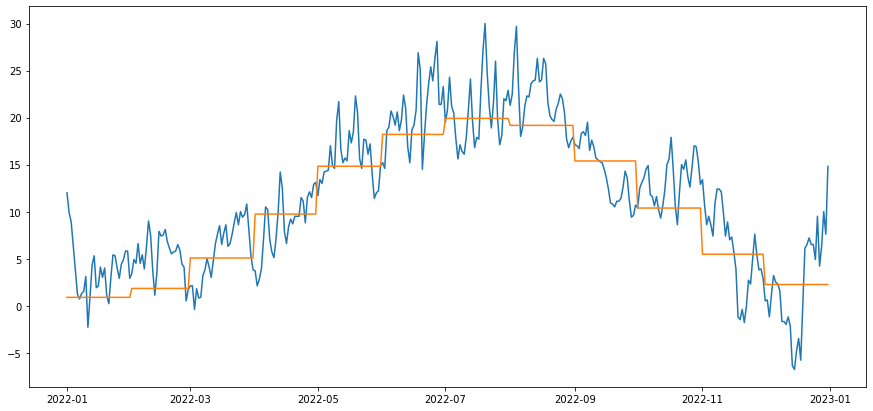

In [102]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(test[['mean_temperature', 'trend_seasonal']])
plt.show()

In [103]:
#Calculate the remainder for the test set

test['remainder'] = test['mean_temperature'] - test['trend_seasonal']
test['lag1'] = test['remainder'].shift(1)
test['lag2'] = test['remainder'].shift(2)
test['lag3'] = test['remainder'].shift(3)
test['lag4'] = test['remainder'].shift(4)

In [104]:
train_whole.tail()

,mean_temperature,timestep,trend,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,random,prediction_lag1
DATE,,,,,,,,,,,,,,,,,,,,
2021-12-27,-3.9,53321,10.310786,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232610,-6.132610,1.464928,2.032087
2021-12-28,-0.5,53322,10.310819,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232643,-2.732643,2.609447,4.403339
2021-12-29,4.5,53323,10.310853,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232676,2.267324,-9.588821,7.183433
2021-12-30,9.3,53324,10.310886,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232709,7.067291,-2.186083,11.271818
2021-12-31,13.0,53325,10.310920,12,0,0,0,0,0,0,0,0,0,0,0,1,2.232742,10.767258,-3.830574,15.196667


In [105]:
# Filling in the missing value from the beginning of the test lag.

# Fill in the NaN in the lag1 column
test.loc['2022-01-01', 'lag1'] = train_whole.loc['2021-12-31', 'remainder']

test.loc['2022-01-01', 'lag2'] = train_whole.loc['2021-12-30', 'remainder']
test.loc['2022-01-02', 'lag2'] = train_whole.loc['2021-12-31', 'remainder']

test.loc['2022-01-01', 'lag3'] = train_whole.loc['2021-12-29', 'remainder']
test.loc['2022-01-02', 'lag3'] = train_whole.loc['2021-12-30', 'remainder']
test.loc['2022-01-03', 'lag3'] = train_whole.loc['2021-12-31', 'remainder']

test.loc['2022-01-01', 'lag4'] = train_whole.loc['2021-12-28', 'remainder']
test.loc['2022-01-02', 'lag4'] = train_whole.loc['2021-12-29', 'remainder']
test.loc['2022-01-03', 'lag4'] = train_whole.loc['2021-12-30', 'remainder']
test.loc['2022-01-04', 'lag4'] = train_whole.loc['2021-12-31', 'remainder']
# Note difference to dropping NaN in training data: given chronological split
# of training and test data, u can take the remainder of the last date in training dataset as lag1 in first
# date of test dataset (i.e. the "next" date chronologically)

In [106]:
# Assign X_test
X_test = test.drop(['mean_temperature', 'trend_seasonal', 'remainder'], axis=1)
X_test.tail(5) # Contains a NaN for the first value of lag1

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,
2022-12-27,53686,0,0,0,0,0,0,0,0,0,0,0,1,7.255430,2.655463,4.255496,4.255528
2022-12-28,53687,0,0,0,0,0,0,0,0,0,0,0,1,1.955397,7.255430,2.655463,4.255496
2022-12-29,53688,0,0,0,0,0,0,0,0,0,0,0,1,4.055364,1.955397,7.255430,2.655463
2022-12-30,53689,0,0,0,0,0,0,0,0,0,0,0,1,7.755331,4.055364,1.955397,7.255430
2022-12-31,53690,0,0,0,0,0,0,0,0,0,0,0,1,5.355298,7.755331,4.055364,1.955397


In [107]:
# Create the predictions
X_test['predictions_full_model'] = m.predict(X_test)

In [108]:
test = test.join(X_test[['predictions_full_model']])


In [109]:
test
last_remainder1 = test.loc['2022-12-31', 'remainder']
last_remainder2 = test.loc['2022-12-30', 'remainder']
last_remainder3 = test.loc['2022-12-29', 'remainder']
last_remainder4 = test.loc['2022-12-28', 'remainder']

In [110]:
last_remainder1

12.555265513054982

In [111]:
test

,mean_temperature,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,,,,
2022-01-01,12.0,53326,1,0,0,0,0,0,0,0,...,0,0,0,0.875507,11.124493,10.767258,7.067291,2.267324,-2.732643,9.511863
2022-01-02,9.9,53327,1,0,0,0,0,0,0,0,...,0,0,0,0.875540,9.024460,11.124493,10.767258,7.067291,2.267324,9.468651
2022-01-03,8.9,53328,1,0,0,0,0,0,0,0,...,0,0,0,0.875572,8.024428,9.024460,11.124493,10.767258,7.067291,7.750200
2022-01-04,6.4,53329,1,0,0,0,0,0,0,0,...,0,0,0,0.875605,5.524395,8.024428,9.024460,11.124493,10.767258,7.318074
2022-01-05,3.8,53330,1,0,0,0,0,0,0,0,...,0,0,0,0.875638,2.924362,5.524395,8.024428,9.024460,11.124493,5.105812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,4.2,53686,0,0,0,0,0,0,0,0,...,0,0,1,2.244603,1.955397,7.255430,2.655463,4.255496,4.255528,8.722692
2022-12-28,6.3,53687,0,0,0,0,0,0,0,0,...,0,0,1,2.244636,4.055364,1.955397,7.255430,2.655463,4.255496,2.875840
2022-12-29,10.0,53688,0,0,0,0,0,0,0,0,...,0,0,1,2.244669,7.755331,4.055364,1.955397,7.255430,2.655463,6.053049


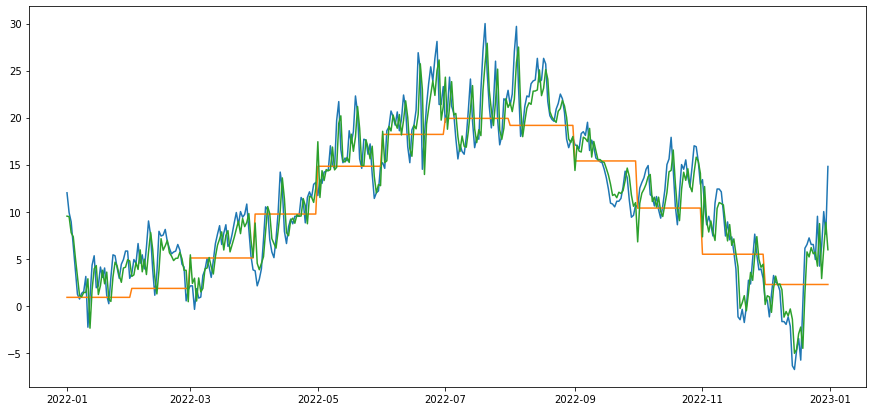

In [112]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(test[['mean_temperature', 'trend_seasonal', 'predictions_full_model']])
plt.show()

In [113]:
#test[['mean_temperature', 'trend_seasonal', 'predictions_full_model']]
train_whole['predictions_full_model'] = y_train [['prediction_all']]

In [114]:
X_train.head()

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,
1876-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597
1876-01-07,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564
1876-01-08,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469
1876-01-09,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501
1876-01-10,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534


In [115]:
X_test.head()

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,
2022-01-01,53326,1,0,0,0,0,0,0,0,0,0,0,0,10.767258,7.067291,2.267324,-2.732643,9.511863
2022-01-02,53327,1,0,0,0,0,0,0,0,0,0,0,0,11.124493,10.767258,7.067291,2.267324,9.468651
2022-01-03,53328,1,0,0,0,0,0,0,0,0,0,0,0,9.024460,11.124493,10.767258,7.067291,7.750200
2022-01-04,53329,1,0,0,0,0,0,0,0,0,0,0,0,8.024428,9.024460,11.124493,10.767258,7.318074
2022-01-05,53330,1,0,0,0,0,0,0,0,0,0,0,0,5.524395,8.024428,9.024460,11.124493,5.105812


In [116]:
# Create the complete dataset and plot it
X_full = X_train.append(X_test)

In [117]:
X_full

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4,predictions_full_model
DATE,,,,,,,,,,,,,,,,,,
1876-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597,NaN
1876-01-07,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564,NaN
1876-01-08,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469,NaN
1876-01-09,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501,NaN
1876-01-10,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,53686,0,0,0,0,0,0,0,0,0,0,0,1,7.255430,2.655463,4.255496,4.255528,8.722692
2022-12-28,53687,0,0,0,0,0,0,0,0,0,0,0,1,1.955397,7.255430,2.655463,4.255496,2.875840
2022-12-29,53688,0,0,0,0,0,0,0,0,0,0,0,1,4.055364,1.955397,7.255430,2.655463,6.053049


In [118]:
X_full = X_full.drop(['predictions_full_model'], axis =1)


In [119]:
X_full

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,
1876-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597
1876-01-07,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564
1876-01-08,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469
1876-01-09,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501
1876-01-10,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,53686,0,0,0,0,0,0,0,0,0,0,0,1,7.255430,2.655463,4.255496,4.255528
2022-12-28,53687,0,0,0,0,0,0,0,0,0,0,0,1,1.955397,7.255430,2.655463,4.255496
2022-12-29,53688,0,0,0,0,0,0,0,0,0,0,0,1,4.055364,1.955397,7.255430,2.655463


In [120]:
# Combine the datasets; this is different from X_full in the sense that we are combining 
# training and validation set of flights to one dataset


### Predict the future

In [1226]:
# Fill in the missing value from the beginning of the test set ????

In [122]:
y_full = y_train[['mean_temperature']].append(test[['mean_temperature']])


In [128]:
print(f"""
{round(m.score(X_test[:-1], test['mean_temperature']), 3)}
{round(m.score(X_full, y_full['mean_temperature']), 3)}
""")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- predictions_full_model


In [129]:
y_full

,mean_temperature
DATE,
1876-01-06,-7.7
1876-01-07,-6.6
1876-01-08,-8.9
1876-01-09,-12.7
1876-01-10,-8.9
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


In [130]:
#fit a model on the complete (!) dataset => m_combined is then used to predict on X_future (unseen data)
m_final = LinearRegression()
m_final.fit(X_full, y_full)

LinearRegression()

In [131]:
data_full = X_full.join(y_full)
data_full

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4,mean_temperature
DATE,,,,,,,,,,,,,,,,,,
1876-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597,-7.7
1876-01-07,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564,-6.6
1876-01-08,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469,-8.9
1876-01-09,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501,-12.7
1876-01-10,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534,-8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,53686,0,0,0,0,0,0,0,0,0,0,0,1,7.255430,2.655463,4.255496,4.255528,4.2
2022-12-28,53687,0,0,0,0,0,0,0,0,0,0,0,1,1.955397,7.255430,2.655463,4.255496,6.3
2022-12-29,53688,0,0,0,0,0,0,0,0,0,0,0,1,4.055364,1.955397,7.255430,2.655463,10.0


In [132]:
# We are going to create a single future step data
# We want to recreate a future datapoint that corresponds to the next timestep (january 2023); 
# so we will add timestep:
timestep = data_full['timestep'].max() + 1
months = [1] + [0] * 11  # array of zeroes
lag1 = last_remainder1
lag2 = last_remainder2
lag3 = last_remainder3
lag4 = last_remainder4

# lag for the new datapoint/row is the remaidner in the last for of the combined dataset

In [133]:
timestep, months, lag1, lag2, lag3, lag3 # this is the remainder of the last row (its always like that...so when we create the lag for the new row,
# we take the remainder col of 1960)

(53691,
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 12.555265513054982,
 5.355298370138104,
 7.755331227221225,
 7.755331227221225)

In [134]:
# Create a future data point
X_future = [timestep]
X_future

[53691]

In [135]:
X_full

,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
DATE,,,,,,,,,,,,,,,,,
1876-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0,-8.923501,-4.923469,1.176564,3.376597
1876-01-07,6,1,0,0,0,0,0,0,0,0,0,0,0,-6.823534,-8.923501,-4.923469,1.176564
1876-01-08,7,1,0,0,0,0,0,0,0,0,0,0,0,-5.723567,-6.823534,-8.923501,-4.923469
1876-01-09,8,1,0,0,0,0,0,0,0,0,0,0,0,-8.023600,-5.723567,-6.823534,-8.923501
1876-01-10,9,1,0,0,0,0,0,0,0,0,0,0,0,-11.823633,-8.023600,-5.723567,-6.823534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,53686,0,0,0,0,0,0,0,0,0,0,0,1,7.255430,2.655463,4.255496,4.255528
2022-12-28,53687,0,0,0,0,0,0,0,0,0,0,0,1,1.955397,7.255430,2.655463,4.255496
2022-12-29,53688,0,0,0,0,0,0,0,0,0,0,0,1,4.055364,1.955397,7.255430,2.655463


In [136]:
X_future.extend(months)
X_future

[53691, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [137]:
X_future.append(lag1)
X_future.append(lag2)
X_future.append(lag3)
X_future.append(lag4)
X_future

[53691,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12.555265513054982,
 5.355298370138104,
 7.755331227221225,
 4.0553640843043475]

In [138]:
X_future = pd.DataFrame([X_future])


In [139]:
X_future

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,53691,1,0,0,0,0,0,0,0,0,0,0,0,12.555266,5.355298,7.755331,4.055364


In [140]:
X_future.columns = X_full.columns
X_future


,timestep,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
0,53691,1,0,0,0,0,0,0,0,0,0,0,0,12.555266,5.355298,7.755331,4.055364


In [141]:
# Prediction for 2023-01-01
m_final.predict(X_future)

array([[11.92201177]])

In [ ]:
# How does this look like for 2023-01-02?
#timestep = flights_combined['timestep'].max() + 2 # since we had +1 in the earlier one
#months = [1] + [0]*10
#lag = 0 # 
# This is too far in the future to calculate lag, 
# we don't have remainder for the previous data point (X_future),
# this is now only modeling trend-seasonal component


#X_future_2 = pd.DataFrame([[timestep] + months + [lag]], columns = X_combined.columns)
#X_future_2

# Prediction for 1961-02-01
#m_combined.predict(X_future_2)
# this is the numer of clients (projected for one day ahead!)

# u could now datapoints by yourself in order to predict